In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

### Baseline values

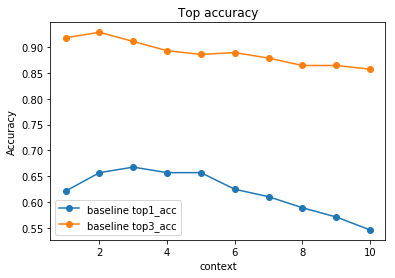

max top1_acc acc=0.6678571428571428 at context = 3 
max top3_acc acc=0.9285714285714286 at context = 2 


In [2]:
tested_top_ks = ["top1_acc", "top3_acc"]
experiment = "context"
experiment_path = "../baseline/contexts2/"
results_df = pd.read_csv(experiment_path + 'results.csv')
for top_k in tested_top_ks:
    plt.plot(results_df[experiment], results_df[top_k], 'o-', label="baseline {}".format(top_k))
plt.xlabel(experiment)
plt.ylabel('Accuracy')
plt.title('Top accuracy')
plt.legend()
plt.savefig('baseline_{}_top_acc.png'.format(experiment))
plt.show()


for top_k in tested_top_ks:
    max_acc = results_df[top_k].max()
    print('max {} acc={} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][results_df[top_k].idxmax()]))
    

### Experiment 1 - alpha optimization over different contexts

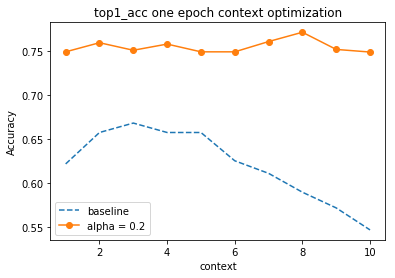

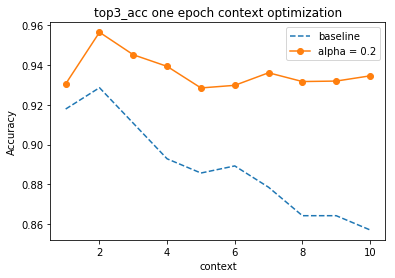

In [3]:
tested_top_ks = ["top1_acc", "top3_acc"]
experiment = "context"
experiment_no = 2
baseline_path = "../baseline/contexts2/"
experiment_path = "../experiment1/contexts_0/"
with open(experiment_path + 'args.txt') as f:
    data = json.load(f)
    alpha = data["alpha"]

for top_k in tested_top_ks:
    results_df = pd.read_csv(baseline_path + 'results.csv')
    plt.plot(results_df[experiment], results_df[top_k], '--', label="baseline")
    
    top_acc = 0 * results_df[top_k]
    num_shuffles = 30
    for i in range(num_shuffles):
        experiment_path = "../experiment1/contexts_{}/".format(i)
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = top_acc + results_df[top_k]
    top_acc = top_acc/num_shuffles
    plt.plot(results_df[experiment], top_acc, 'o-', label="alpha = {}".format(alpha))

    plt.xlabel(experiment)
    plt.ylabel('Accuracy')
    plt.title( top_k + " one epoch " + experiment + " optimization") 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()

### Experiment 2 - test different alpha parameters with fixed context (3 was the best for baseline configuration)

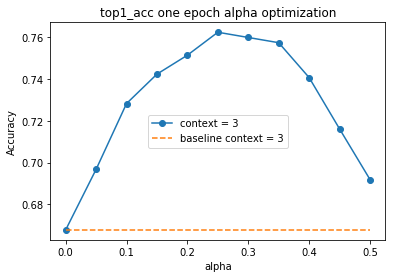

max top1_acc acc=0.7622619047619048 at alpha = 0.25 


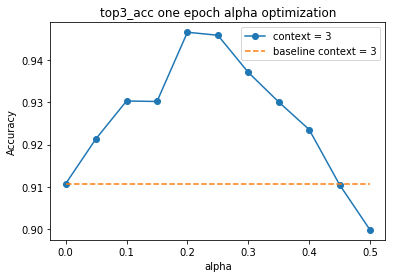

max top3_acc acc=0.946666666666667 at alpha = 0.2 


In [4]:
tested_top_ks = ["top1_acc", "top3_acc"]
experiment = "alpha"
experiment_no = 2
subexperiment_no = 5
experiment_path = "../experiment{}/{}{}_0/".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path + 'args.txt') as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]

for top_k in tested_top_ks:
    results_df = pd.read_csv(experiment_path + 'results.csv')
    top_acc = 0 * results_df[top_k]
    num_shuffles = 30
    for i in range(num_shuffles):
        experiment_path = "../experiment{}/{}{}_{}/".format(experiment_no, experiment, subexperiment_no, i)
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = top_acc + results_df[top_k]
    top_acc = top_acc/num_shuffles
    plt.plot(results_df[experiment], top_acc, 'o-', label="context = {}".format(context))
    plt.plot(results_df[experiment], [results_df[top_k][0] for _ in top_acc], '--', label="baseline context = {}".format(context))

    plt.xlabel(experiment)
    plt.ylabel('Accuracy')
    plt.title( top_k + " one epoch " + experiment + " optimization") 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    max_acc = top_acc.max()
    print('max {} acc={} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][top_acc.idxmax()]))

### Experiment 3 - test different beta parameters with fixed alpha and context (alpha = 0.25, context = 3)

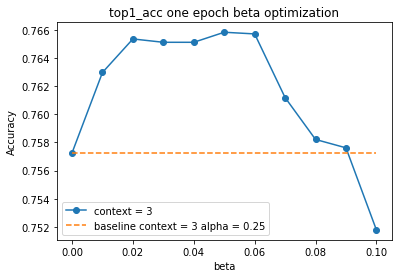

max top1_acc acc=0.7658333333333335 at beta = 0.05 


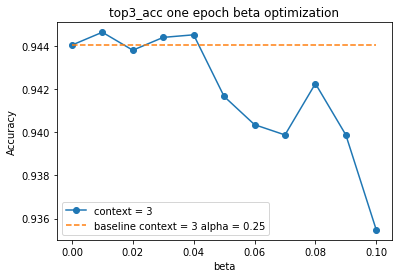

max top3_acc acc=0.9446428571428573 at beta = 0.01 


In [5]:
tested_top_ks = ["top1_acc", "top3_acc"]
experiment = "beta"
experiment_no = 3
subexperiment_no = 0
experiment_path = "../experiment{}/{}{}_0/".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path + 'args.txt') as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]
    alpha = data["alpha"]

for top_k in tested_top_ks:
    results_df = pd.read_csv(experiment_path + 'results.csv')
    top_acc = 0 * results_df[top_k]
    num_shuffles = 30
    for i in range(num_shuffles):
        experiment_path = "../experiment{}/{}{}_{}/".format(experiment_no, experiment, subexperiment_no, i)
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = top_acc + results_df[top_k]
    top_acc = top_acc/num_shuffles
    plt.plot(results_df[experiment], top_acc, 'o-', label="context = {}".format(context))
    plt.plot(results_df[experiment], [top_acc[0] for _ in top_acc], '--', label="baseline context = {} alpha = {}".format(context, alpha))

    plt.xlabel(experiment)
    plt.ylabel('Accuracy')
    plt.title( top_k + " one epoch " + experiment + " optimization") 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    max_acc = top_acc.max()
    print('max {} acc={} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][top_acc.idxmax()]))

### Experiment 4 - test longer training with fixed alpha, beta and context (alpha = 0.25, context = 3, beta = 0.05)

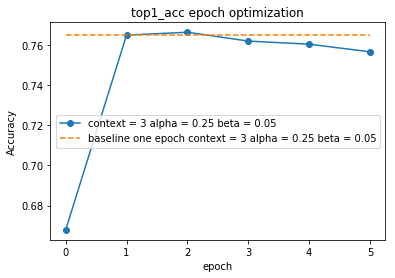

max top1_acc acc=0.7664285714285716 at epoch = 2 


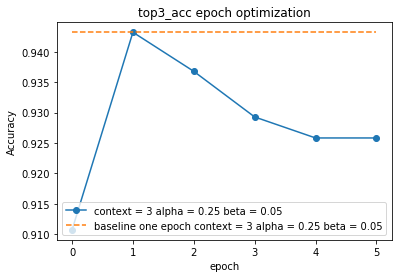

max top3_acc acc=0.9432142857142856 at epoch = 1 


In [10]:
tested_top_ks = ["top1_acc", "top3_acc"]
experiment = "epoch"
experiment_no = 4
subexperiment_no = 3
experiment_path = "../experiment{}/{}s{}_0/".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path + 'args.txt') as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]
    alpha = data["alpha"]
    beta = data["beta"]

for top_k in tested_top_ks:
    results_df = pd.read_csv(experiment_path + 'results.csv')
    top_acc = 0 * results_df[top_k]
    num_shuffles = 30
    for i in range(num_shuffles):
        experiment_path = "../experiment{}/{}s{}_{}/".format(experiment_no, experiment, subexperiment_no, i)
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = top_acc + results_df[top_k]
    top_acc = top_acc/num_shuffles
    plt.plot(results_df[experiment], top_acc, 'o-',label="context = {} alpha = {} beta = {}".format(context, alpha, beta))
    plt.plot(results_df[experiment], [top_acc[1] for _ in top_acc], '--', label="baseline one epoch context = {} alpha = {} beta = {}".format(context, alpha, beta))

    plt.xlabel(experiment)
    plt.ylabel('Accuracy')
    plt.title( top_k + " " + experiment + " optimization") 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    max_acc = top_acc.max()
    print('max {} acc={} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][top_acc.idxmax()]))

### Testing epochs with lower parameters

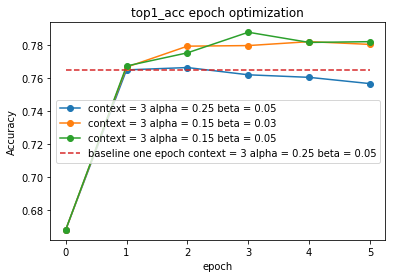

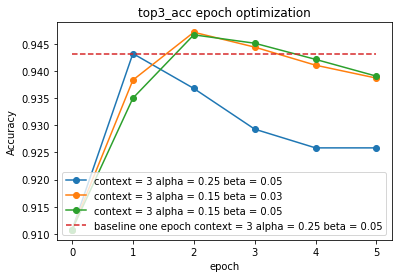

In [41]:
tested_top_ks = ["top1_acc", "top3_acc"]
tested_subexperiments=[3, 6, 7] # valid range(3,12)
experiment = "epoch"
experiment_no = 4
num_shuffles = 30

for top_k in tested_top_ks:
    for subexperiment_no in tested_subexperiments:
        experiment_path = "../experiment{}/{}s{}_0/".format(experiment_no, experiment, subexperiment_no)
        with open(experiment_path + 'args.txt') as f:
            data = json.load(f)
            assert(data["shuffle"])
            context = data["context"]
            alpha = data["alpha"]
            beta = data["beta"]
        
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = 0 * results_df[top_k]
        for i in range(num_shuffles):
            experiment_path = "../experiment{}/{}s{}_{}/".format(experiment_no, experiment, subexperiment_no, i)
            results_df = pd.read_csv(experiment_path + 'results.csv')
            top_acc = top_acc + results_df[top_k]
        top_acc = top_acc/num_shuffles
        plt.plot(results_df[experiment], top_acc, 'o-',label="context = {} alpha = {} beta = {}".format(context, alpha, beta))
        
        
    # Calculate baseline
    major_subexperiment_no = 3
    top_acc = 0 * results_df[top_k]
    for i in range(num_shuffles):
        experiment_path = "../experiment{}/{}s{}_{}/".format(experiment_no, experiment, major_subexperiment_no, i)
        results_df = pd.read_csv(experiment_path + 'results.csv')
        top_acc = top_acc + results_df[top_k]
        with open(experiment_path + 'args.txt') as f:
            data = json.load(f)
            assert(data["shuffle"])
            context = data["context"]
            alpha = data["alpha"]
            beta = data["beta"]
    
    
    top_acc = top_acc/num_shuffles
    plt.plot(results_df[experiment], [top_acc[1] for _ in top_acc], '--', label="baseline one epoch context = {} alpha = {} beta = {}".format(context, alpha, beta))

    plt.xlabel(experiment)
    plt.ylabel('Accuracy')
    plt.title( top_k + " " + experiment + " optimization") 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    #max_acc = top_acc.max()
    #print('max {} acc={} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][top_acc.idxmax()]))